<a href="https://colab.research.google.com/github/bipinKrishnan/ML_from_scratch/blob/master/fashionMNIST_d2l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [139]:
transform = transforms.ToTensor()
trainset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

In [7]:
len(trainset), len(testset)

(60000, 10000)

In [9]:
trainset[0][0].shape

torch.Size([1, 28, 28])

In [47]:
def get_labels(label):
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

  return text_labels[int(label)]

In [56]:
def show_img(num_rows, num_columns):
  plt.figure(figsize=(8, 6))
  
  for i, (img, label) in enumerate(trainset):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(get_labels(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze())

    if (i+1) >= (num_rows*num_columns):
      break
  plt.show()

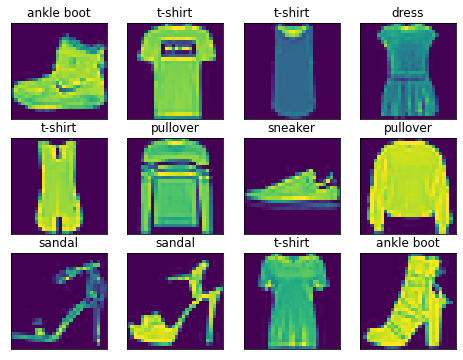

In [57]:
show_img(3, 4)

In [109]:
dataloader_workers = 4
bs = 256
trainloader = DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=dataloader_workers)

In [111]:
for img, label in trainloader:
  print(img.shape, label.shape)
  break

torch.Size([256, 1, 28, 28]) torch.Size([256])


Putting everything together

In [130]:
def load_data(batch_size=bs, transform=None):
  if transform:
    trans = transforms.Compose(transform)

  trainset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
  testset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

  return (DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=dataloader_workers), 
          DataLoader(testset, batch_size=bs, shuffle=False, num_workers=dataloader_workers))


In [142]:
train_iter, test_iter = load_data(transform=transform)

In [143]:
for (img1, label1), (img2, label2) in zip(train_iter, test_iter):
  print(img1.shape, label1.shape, img2.shape, label2.shape)
  break

torch.Size([256, 1, 28, 28]) torch.Size([256]) torch.Size([256, 1, 28, 28]) torch.Size([256])
